In [17]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2

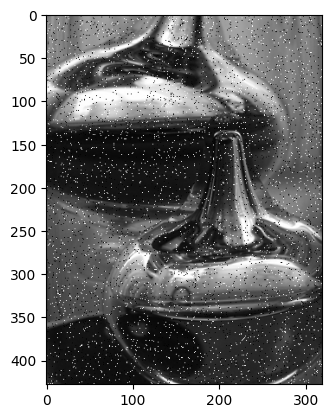

In [18]:
# Median filter thuong duoc dung de giam noise trong buc anh (dac biet la salt and pepper noise)
filename = 'noisyImage.png'
img = cv2.imread(filename)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

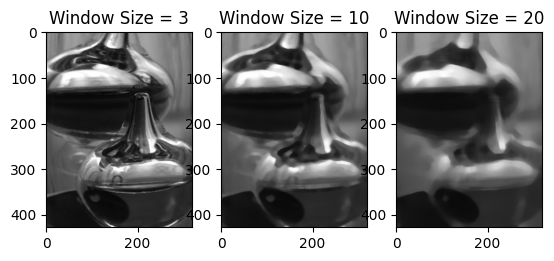

In [19]:
# Su dung ham co san trong scipy

f, arr = plt.subplots(1,3)
arr[0].imshow(ndimage.median_filter(img, size=3))
arr[0].title.set_text('Window Size = 3')

arr[1].imshow(ndimage.median_filter(img, size=10))
arr[1].title.set_text('Window Size = 10')

arr[2].imshow(ndimage.median_filter(img, size=20))
arr[2].title.set_text('Window Size = 20')

# Nhan xet: Do tinh chat trung vi (median) nen khi chung ta tang kich thuoc ma tran, anh duoc loc se nhoe hon

In [20]:
# Tu cai dat ham median filter
def median_filter(img, window_size=3):
    ret_img = img
    height, width = img.shape[:2]
    edge = window_size//2
    window_area = window_size*window_size
    
    for i in range(edge, height - edge):
        for j in range(edge, width - edge):
            window = []
            x = i - edge
            y = j - edge
            for d_i in range(window_size):
                for d_j in range(window_size):
                    window.extend([img[x + d_i][y + d_j][0]])
            window = np.sort(window)
            med = np.median(window)
            ret_img[i][j] = np.array([med, med, med])
    
    return ret_img


Text(0.5, 1.0, 'Median filter tu code')

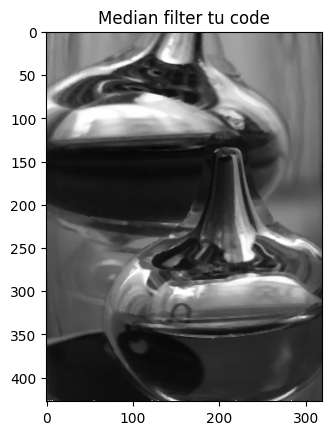

In [21]:
test_img = median_filter(img)
plt.imshow(test_img)
plt.title('Median filter tu code')